## Statistics Report (MECD - FEUP): Inicial exploration (?)
Fundamentos de Ciência e Engenharia dos Dados
-- Group 6 -- Henrique Ribeiro, Rojan Aslani, Sónia Ferreira (14/10/2022)

`-->Research Question:`
Compare response, extinction time and cause of the wildfires, to see the influence on the burn areas for districts of Braga and Santarém.

`-->Qualitative variables`
Distrito (Braga and Santarém)
Causa ( 2 causes will be chosen from the list)
 
`-->Quantitative variables`
ResponseTime (HoraAlerta - Hora1Intervencao)
ExtinctionTime (Hora1Intervencao - HoraExtincao)
AA_Total

 Meaning that since, it was determined that some fields had missing values (empty values), that would then result on 0 InterventionTimeMin and 0 ExtinctionTimeMin these values were cleaned (removed) from the datasets as a "zero" value would make no sense. For the same reason, it was decided, for the purpose of this study, to remove the values under 2min for the previous field mentioned as well.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

#import original dataset 
df = pd.read_excel('ListaIncendios_2015.xlsx', '2015', header=0, usecols="A:AL")
df.head()

,Ano,Codigo SGIF,Codigo_ANPC,Tipo,Distrito,Concelho,Freguesia,Local,INE,x,...,Falso Alarme,Fogacho,Incendio,Agricola,Perimetro,APS,Causa,TipoCausa,Região PROF,UGF
0,2015,DM315252,2015160007544,Florestal,Viana do Castelo,Ponte de Lima,Serdedelo,VALE DE TROVELA (SERDEDELO),160746,167814,...,0,0,1,0,NaN,NaN,122.0,Negligente,Entre Douro e Minho,Alto Minho
1,2015,DM215305,2015130043758,Florestal,Porto,Marco de Canaveses,Vila Boa de Quires,LUGAR DO FOFO,130731,193731,...,0,0,1,0,NaN,NaN,122.0,Negligente,Entre Douro e Minho,Tâmega
2,2015,DM415293,2015030021973,Florestal,Braga,Vila Verde,Lage,RUA PROF ABEL MADEIRA,31323,172162,...,0,1,0,0,NaN,NaN,60.0,Desconhecida,Entre Douro e Minho,Baixo Minho
3,2015,DM315261,2015160007563,Falso Alarme,Viana do Castelo,Ponte de Lima,Boalhosa,J. DEPOSITOS DE AGUA (BOALHOSA),160709,171291,...,1,0,0,0,NaN,NaN,630.0,Desconhecida,Entre Douro e Minho,Alto Minho
4,2015,BL115321,2015180015874,Agrícola,Viseu,Castro Daire,Castro Daire,Farejinhas - Bº das Queirós,180304,217299,...,0,1,0,0,NaN,NaN,630.0,Desconhecida,Beira Litoral,Dão Lafões
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23170,2015,DM4151671,2015030056919,Florestal,Braga,Fafe,Fafe,RUA DE FORNELO,30709,196478,...,0,1,0,0,NaN,NaN,60.0,Desconhecida,Entre Douro e Minho,Baixo Minho
23171,2015,BL1151018,2015180041997,Florestal,Viseu,Cinfães,Cinfães,Ventuzela,180403,203110,...,0,0,1,0,NaN,NaN,125.0,Negligente,Entre Douro e Minho,Tâmega
23172,2015,BL3151227,2015010055691,Falso Alarme,Aveiro,Santa Maria da Feira,Feira,avenida 25 de abril,10906,164395,...,1,0,0,0,NaN,NaN,NaN,NaN,Entre Douro e Minho,AMP e Entre Douro e Vouga
23173,2015,DM2153226,2015130115988,Florestal,Porto,Paços de Ferreira,Paços de Ferreira,Lugar alto das Cavadas,130912,180666,...,0,1,0,0,NaN,NaN,711.0,Reacendimento,Entre Douro e Minho,Tâmega


In [3]:
#dataset size
print(df.shape)

(23175, 38)


In [4]:
#show columns data type 
df.dtypes

Ano                                      int64
Codigo SGIF                             object
Codigo_ANPC                              int64
Tipo                                    object
Distrito                                object
Concelho                                object
Freguesia                               object
Local                                   object
INE                                      int64
x                                        int64
y                                        int64
lat                                     object
lon                                     object
DataAlerta                              object
HoraAlerta                              object
DataExtincao                            object
HoraExtincao                            object
Data1Intervencao                        object
Hora1Intervencao                        object
FonteAlerta                            float64
NUT                                     object
AA_Povoamento

In [5]:
#show stats values in the dataset
df.describe(include='all')

,Ano,Codigo SGIF,Codigo_ANPC,Tipo,Distrito,Concelho,Freguesia,Local,INE,x,...,Falso Alarme,Fogacho,Incendio,Agricola,Perimetro,APS,Causa,TipoCausa,Região PROF,UGF
count,23175.0,23175,2.317500e+04,23175,23175,23175,23175,23174,23175.000000,23175.000000,...,23175.000000,23175.000000,23175.000000,23175.000000,826,1059,16162.000000,16162,23173,23174
unique,NaN,23175,NaN,4,19,319,3290,17236,NaN,NaN,...,NaN,NaN,NaN,NaN,87,28,NaN,5,11,27
top,NaN,DM315252,NaN,Florestal,Porto,Penafiel,Lordelo,IGREJA,NaN,NaN,...,NaN,NaN,NaN,NaN,Barroso,PENEDA-GERÊS,NaN,Negligente,Entre Douro e Minho,Tâmega
freq,NaN,1,NaN,15464,4444,477,113,50,NaN,NaN,...,NaN,NaN,NaN,NaN,121,200,NaN,5957,9024,3276
mean,2015.0,NaN,2.015105e+12,NaN,NaN,NaN,NaN,NaN,105733.668910,184868.251953,...,0.126214,0.540539,0.143430,0.162934,NaN,NaN,356.427360,NaN,NaN,NaN
std,0.0,NaN,5.314577e+07,NaN,NaN,NaN,NaN,NaN,53162.190467,49472.361288,...,0.332097,0.498365,0.350519,0.369314,NaN,NaN,246.973762,NaN,NaN,NaN
min,2015.0,NaN,2.015010e+12,NaN,NaN,NaN,NaN,NaN,10101.000000,81317.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN
25%,2015.0,NaN,2.015060e+12,NaN,NaN,NaN,NaN,NaN,60206.000000,157090.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,124.000000,NaN,NaN,NaN
50%,2015.0,NaN,2.015120e+12,NaN,NaN,NaN,NaN,NaN,121303.000000,179200.000000,...,0.000000,1.000000,0.000000,0.000000,NaN,NaN,448.000000,NaN,NaN,NaN
75%,2015.0,NaN,2.015140e+12,NaN,NaN,NaN,NaN,NaN,142111.000000,212096.500000,...,0.000000,1.000000,0.000000,0.000000,NaN,NaN,630.000000,NaN,NaN,NaN


In [7]:
#Analysis of null - check if in the dataset we have nulls
df.apply(lambda x: sum(x.isnull()), axis=0)

Ano                                        0
Codigo SGIF                                0
Codigo_ANPC                                0
Tipo                                       0
Distrito                                   0
Concelho                                   0
Freguesia                                  0
Local                                      1
INE                                        0
x                                          0
y                                          0
lat                                        0
lon                                        0
DataAlerta                                 0
HoraAlerta                                 0
DataExtincao                             312
HoraExtincao                             317
Data1Intervencao                        1199
Hora1Intervencao                        1213
FonteAlerta                            23175
NUT                                        0
AA_Povoamento (ha)                         0
AA_Mato (h

C:\Users\aslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:264: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  curves.iloc[:, cols] = (curves
C:\Users\aslan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<Figure size 1000x600 with 0 Axes>

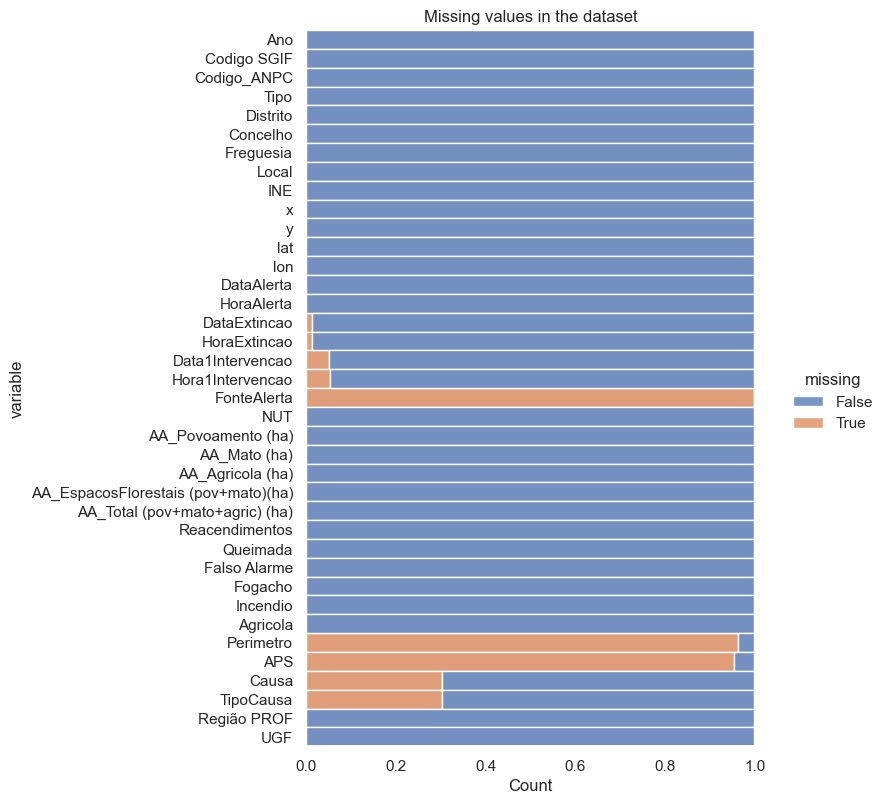

In [8]:
#Graph with null vals in dataset
sns.set_theme(style="dark")
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    #aspect=1.25
    height=8
)
plt.title('Missing values in the dataset');

In [ ]:
#Since the datasets were previously cleaned it’s not expected that they have null values, but lets observe:
#Analysis of null - check if in the dataset we have nulls

#print(district1 +':')
#dataset1.apply(lambda x: sum(x.isnull()), axis=0)